In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
from molsysmt import puw

# Dihedral angles

## How to get any dihedral angle

Lets load a molecular systems to illustrate how MolSysMT works with the dihedral angles:

In [3]:
molecular_system = msm.demo_systems.metenkephalin()

In [4]:
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_frames
molsysmt.MolSys,72,5,1,1,1,1,1,1


In [8]:
view = msm.view(molecular_system)
view.clear()
view.add_ball_and_stick('all')
view

NGLWidget()

A dihedral angles is defined by three vectors $\vec{O_1E_1}$, $\vec{O_2E_2}$ y $\vec{O_3E_3}$, where $O_i$ and $E_i$ are the origin and end points of vector $i$. In molecular physics, a dihedral angle is a degree of freedom defined by three consecutive covalent bonds $\vec{O_1O_2}$, $\vec{O_2O_3}$, $\vec{O_3E_3}$ where in this context $O_1$, $O_2$, $O_3$ and $E_3$ are the position of the atoms defining the covalent chain. Thus, before showing how the dihedral angles are computed with `molsysmt.dihedral_angles`, lets have a look to the section 'How to get the covalent chains' where the methods `molsysmt.covalent_chains` and `molsysmt.covalent_dihedral_quartets` are introduced.

Lets first get all 4 atoms sequences in our molecular system covalently bound with the following names and order: C-N-CA-CB.

In [10]:
covalent_chains = msm.covalent_chains(molecular_system, chain=['atom_name=="C"', 'atom_name=="N"',
                                                               'atom_name=="CA"', 'atom_name=="C"'])

In [11]:
covalent_chains

array([[19, 21, 23, 26],
       [26, 28, 30, 33],
       [33, 35, 37, 53],
       [53, 55, 57, 70]])

Lets have a look to the third C-N-CA-C atoms chain found in our molecular system: 

In [13]:
view = msm.view(molecular_system, viewer='NGLView')
view.clear()
selection_quartet = msm.select(molecular_system, selection=covalent_chains[2], to_syntaxis='NGLView')
view.add_ball_and_stick('all', color='white')
view.add_ball_and_stick(selection_quartet, color='orange')
view

NGLWidget()

The dihedral angle defined by the three consecutive vectors made by these atoms can be calculated as: 

In [14]:
dihedral_angles = msm.get_dihedral_angles(molecular_system, quartets=covalent_chains[2])

In [15]:
dihedral_angles

Magnitude,[[-179.99999499104382]]
Units,degree


The method `molsysmt.covalent_chains` needs as input argument the atom names defining the dihedral angle, but you probably don't remember how $\phi$ or $\psi$ are defined. To keep it simple, MolSysMT includes a specific method named `molsysmt.covalent_dihedral_quartets` that accepts dihedral angles names as input argument:

In [16]:
covalent_chains = msm.covalent_dihedral_quartets(molecular_system, dihedral_angle='phi')

In [17]:
covalent_chains

array([[19, 21, 23, 26],
       [26, 28, 30, 33],
       [33, 35, 37, 53],
       [53, 55, 57, 70]])

The input argument 'quartets' accepts a list of atoms quartets to compute the corresponding dihedral angles:

In [18]:
dihedral_angles = msm.get_dihedral_angles(molecular_system,
                                          quartets=covalent_chains)

In [19]:
dihedral_angles

Magnitude,[[-179.99999499104382 -179.99999499104382 -179.99999499104382 -179.99999499104382]]
Units,degree


The output object is a numpy array with shape: (n_frames, n_angles). As it can be checked in XXX, angles in MolSysMT are expressed in degrees.

In [20]:
dihedral_angles.shape

(1, 4)

Lets add another molecular system to see the result when multiple frames are present:

In [21]:
traj_file = msm.demo_systems.files['pentalanine.h5']
molecular_system = msm.convert(traj_file, to_form='molsysmt.MolSys')
msm.info(molecular_system)

/home/diego/Myopt/miniconda3/envs/MolSysMT_dev/lib/python3.7/site-packages/tables/leaf.py:544: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  key = numpy.array(key)


form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_frames
molsysmt.MolSys,62,7,1,1,1,1,1,5000


In [22]:
covalent_chains = msm.covalent_dihedral_quartets(molecular_system, dihedral_angle="phi-psi",
                                                 selection='group_index==[3,4]')

In [23]:
covalent_chains.shape

(2, 4)

In [24]:
dihedral_angles = msm.get_dihedral_angles(molecular_system, quartets=covalent_chains)

In [25]:
dihedral_angles.shape

(5000, 2)

We can also compute the dihedral angles for a specific set of frames:

In [26]:
dihedral_angles = msm.get_dihedral_angles(molecular_system, quartets=covalent_chains,
                                          frame_indices=range(1000))

In [27]:
dihedral_angles.shape

(1000, 2)

Having the atoms quartets is very convenient if the method is going to be repeated multiple times. If, however, the method is going to be applied just once, the name of the dihedral angles can be introduced as the value of the input argument `dihedral_angle`:

In [28]:
phi_angles = msm.get_dihedral_angles(molecular_system, dihedral_angle='phi')

In [29]:
phi_angles.shape

(5000, 5)

As well as the method `molsysmt.covalent_dihedral_quartets`, `molsysmt.get_dihedral_angles` accepts the value 'all' in its input argument `dihedral_angle`:

In [30]:
all_angles = msm.get_dihedral_angles(molecular_system, dihedral_angle='all',
                                    selection='group_index==[1,2,3]')

In [31]:
all_angles.shape

(5000, 6)

## How to get the Ramachandran angles

Getting the $\phi$ and $\psi$ dihedral angles of a protein it is almost straightfoward with the above method. But to solve this task even more easily, MolSysMT includes a method called `molsysmt.ramachandran_angles`. Lets see how it works. But first lets load molecular system with more than a frame:

In [32]:
traj_file = msm.demo_systems.files['pentalanine.h5']
molecular_system = msm.convert(traj_file, to_form='molsysmt.MolSys')
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_frames
molsysmt.MolSys,62,7,1,1,1,1,1,5000


In [33]:
phi_chains, psi_chains, phi_angles, psi_angles = msm.ramachandran_angles(molecular_system)

The method returns four objects, the covalent chains defining the $\phi$ and $\psi$ dihedral angles and two additional objects with the corresponding values for each angle per frame:

In [34]:
phi_chains.shape

(5, 4)

In [35]:
phi_angles.shape

(5000, 5)

The method also includes the posibility to limit the calculation of the ramachandran angles to an atoms selection over the molecular system:

In [36]:
phi_chains, psi_chains, phi_angles, psi_angles = msm.ramachandran_angles(molecular_system,
                                                                         selection='group_index==[1,2]')

Now the ramachandran map can be plot using the algorithm you like best: 

/home/diego/Myopt/miniconda3/envs/MolSysMT_dev/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1302: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  v = np.array(v, copy=False)
/home/diego/Myopt/miniconda3/envs/MolSysMT_dev/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1672: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  subarr = np.array(values, dtype=dtype, copy=copy)


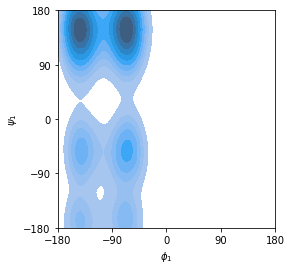

In [37]:
import seaborn as sns

ax = sns.kdeplot(x=phi_angles[:,0], y=psi_angles[:,0], shade=True)
ax.set_xlim(-180.0,180.0)
ax.set_ylim(-180.0,180.0)
ax.set_xticks([-180.0, -90.0, 0.0, 90.0, 180.0])
ax.set_yticks([-180.0, -90.0, 0.0, 90.0, 180.0])
ax.set_xlabel('$\phi_1$')
ax.set_ylabel('$\psi_1$')
ax.set_aspect('equal')

## How to change the dihedral angles of a molecular system

The geometry of a peptide or protein can be changed setting new values to a given dihedral angle (or a set of them). Lets see in the following lines how this can be done with the help of the method `molsysmt.set_dihedral_angles`. First of all a demo molecular system is loaded to play with it:

In [38]:
molecular_system = msm.demo_systems.metenkephalin()

In [39]:
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_frames
molsysmt.MolSys,72,5,1,1,1,1,1,1


Lets get, before changing its value, the second $\phi$ angle in the current conformation of the system:

In [40]:
phi_chains = msm.covalent_dihedral_quartets(molecular_system, dihedral_angle='phi')

In [41]:
all_chains = msm.covalent_dihedral_quartets(molecular_system, dihedral_angle='all')

In [42]:
print(phi_chains[2])

[33 35 37 53]


In [43]:
msm.get_dihedral_angles(molecular_system, quartets=phi_chains[2])

Magnitude,[[-179.99999499104382]]
Units,degree


In [46]:
view = msm.view(molecular_system, viewer='NGLView')
view.clear()
selection_quartet = msm.select(molecular_system, selection=phi_chains[2], to_syntaxis='NGLView')
view.add_ball_and_stick('all', color='white')
view.add_ball_and_stick(selection_quartet, color='orange')
view

NGLWidget()

Now we can rotate this angle in order to have the desired value:

In [47]:
msm.set_dihedral_angles(molecular_system, quartets=phi_chains[2], angles=0.0*puw.unit('degrees'))

In [48]:
view = msm.view(molecular_system, viewer='NGLView')
view.clear()
selection_quartet = msm.select(molecular_system, selection=phi_chains[2], to_syntaxis='NGLView')
view.add_ball_and_stick('all', color='white')
view.add_ball_and_stick(selection_quartet, color='orange')
view

NGLWidget()

In [49]:
msm.get_dihedral_angles(molecular_system, quartets=phi_chains[2])

Magnitude,[[0.0]]
Units,degree


We can also produce a new molecular system with the angle changed making use of the input argument `in_place`:

In [50]:
new_molecular_system = msm.set_dihedral_angles(molecular_system, quartets=phi_chains[2],
                                               angles='-90.0 degrees', in_place=False)

In [51]:
msm.get_dihedral_angles(molecular_system, quartets=phi_chains[2])

Magnitude,[[0.0]]
Units,degree


In [52]:
msm.get_dihedral_angles(new_molecular_system, quartets=phi_chains[2])

Magnitude,[[-89.99999999999999]]
Units,degree


In [53]:
msm.shift_dihedral_angles(new_molecular_system, quartets=phi_chains[2], angles_shifts='45.0 degrees')

In [54]:
msm.get_dihedral_angles(new_molecular_system, quartets=phi_chains[2])

Magnitude,[[-45.000000000000014]]
Units,degree


We can then view both structures to see the effect of the change:

In [56]:
view = msm.view([[molecular_system], [new_molecular_system]])
view.clear()
view.add_licorice()
view

NGLWidget()

In [57]:
view.render_image()

Image(value=b'', width='99%')

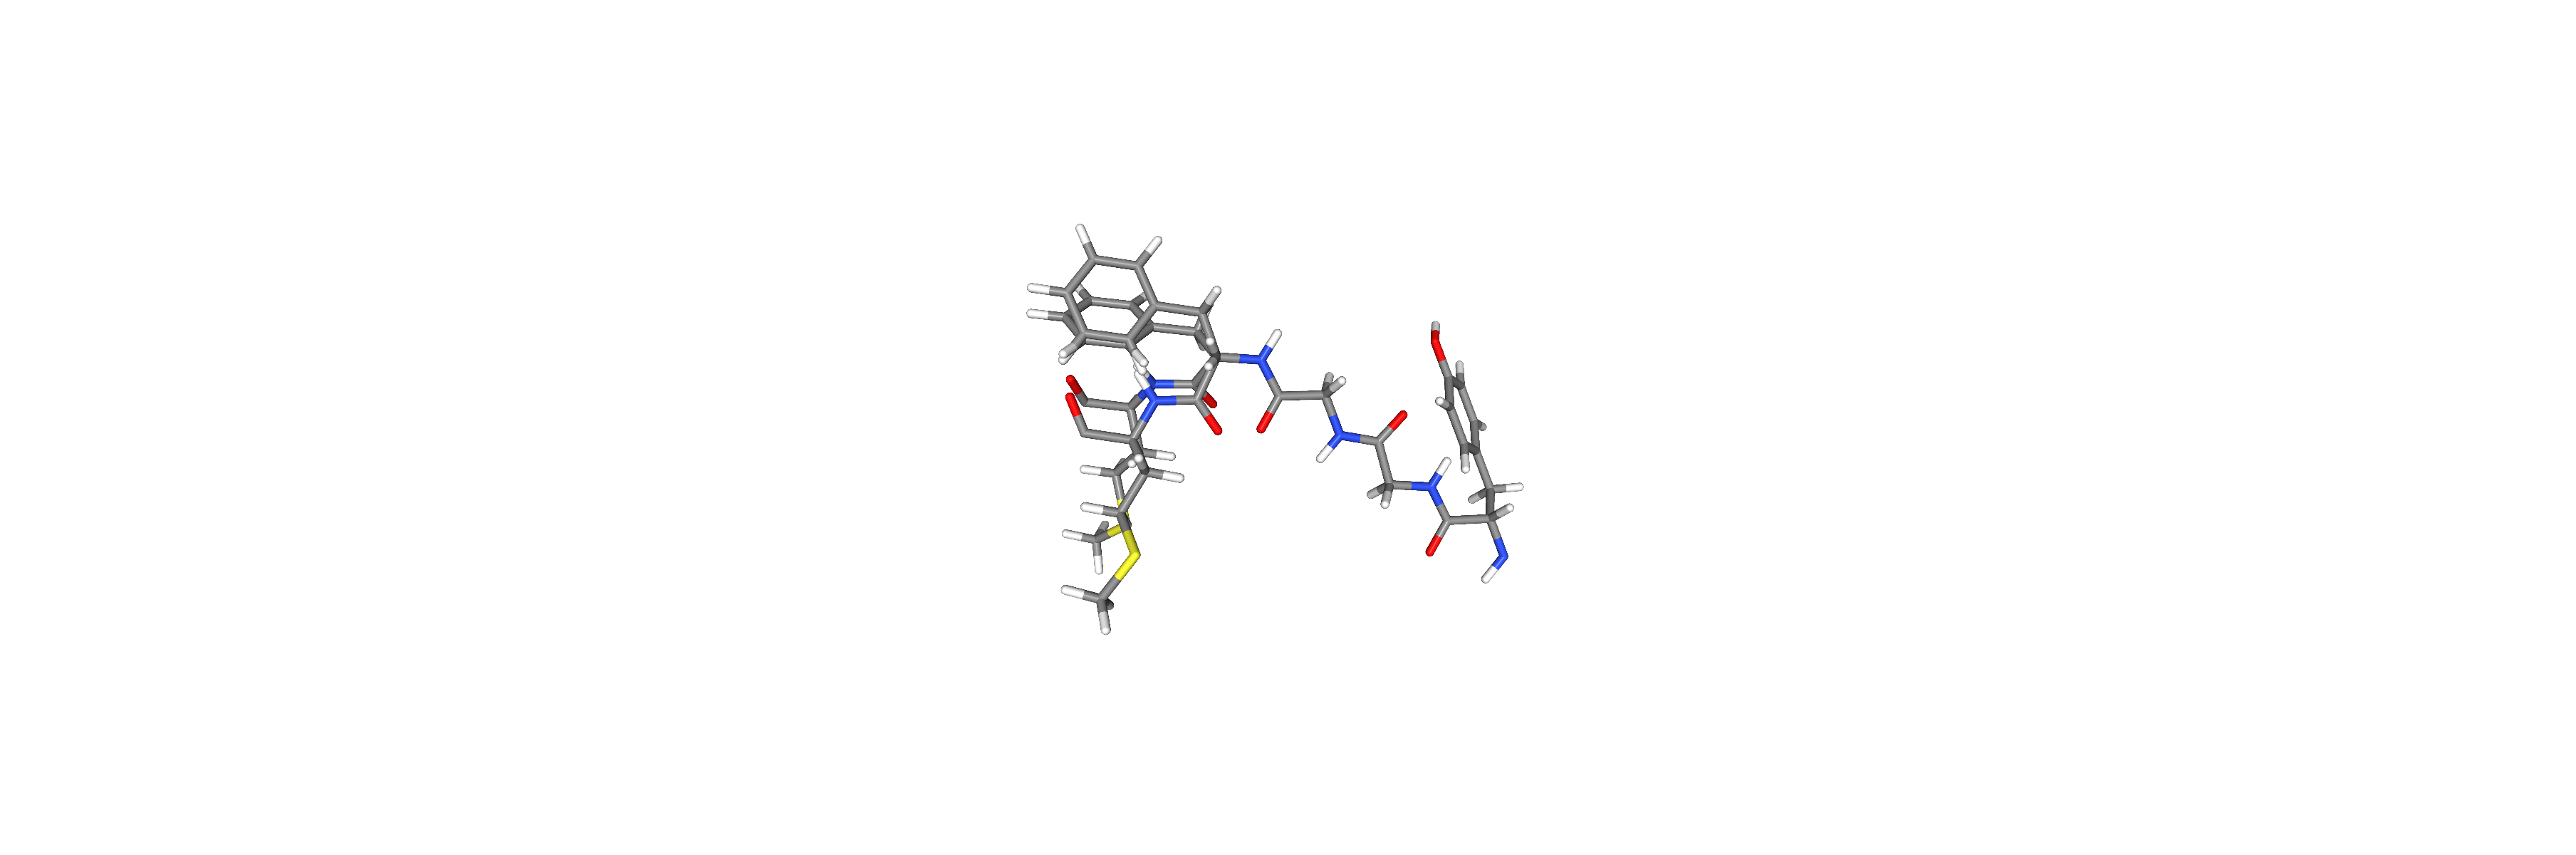

In [58]:
view._display_image()